In [1]:
pg = fits.open('../plane_gaiadr2_dust_11_14_18.fits')[1].data
mol = Table.read('../molclouds.txt', format='ascii')

In [2]:
d = {}
for cloud in range(len(mol)):
    dcut = np.where((pg['gl'] > mol['llower'][cloud]) & (pg['gl'] < mol['lupper'][cloud]) & (pg['gb'] > mol['blower'][cloud]) & (pg['gb'] < mol['bupper'][cloud]) & (pg['dist'] > mol['dist'][cloud]-(mol['d_err_stat'][cloud]+mol['d_err_syst'][cloud])) & (pg['dist'] < mol['dist'][cloud]+(mol['d_err_stat'][cloud]+mol['d_err_syst'][cloud])) & (pg['ebv'] < mol['ebv'][cloud]))
    d['mol' + str(cloud)] = pg[dcut]


/home/steven/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


79


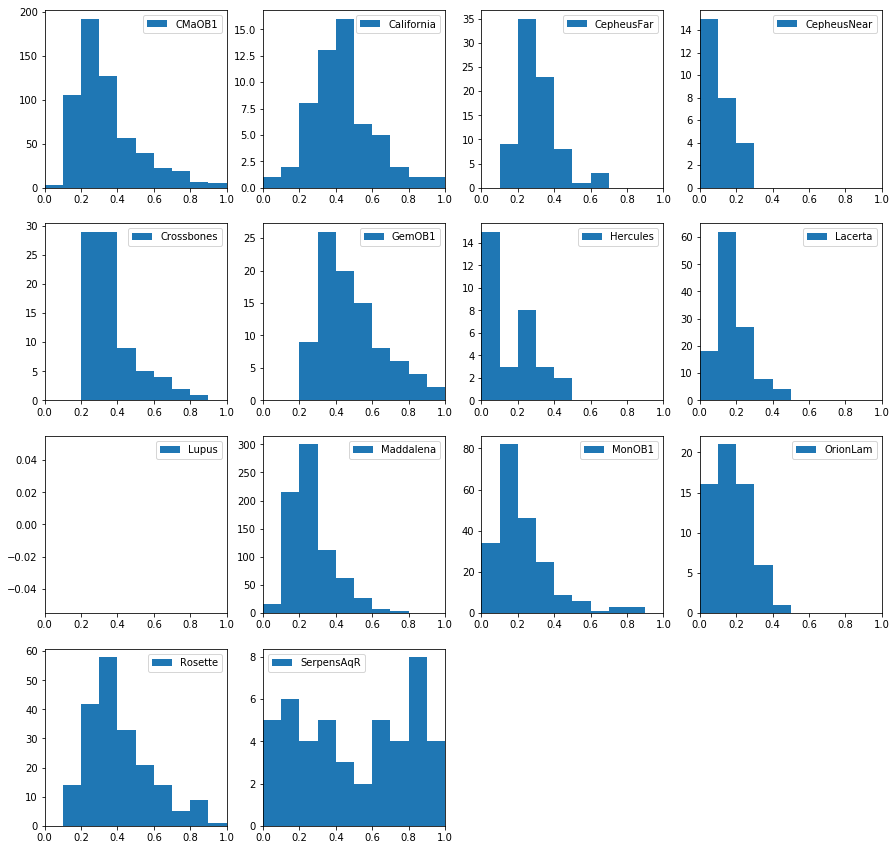

In [3]:
print len(np.sort(d['mol2']['ebv']))

fig = plt.figure(figsize=(15,15))
for i in range(1, 15):
    ax = fig.add_subplot(4, 4, i)
    ax.hist(d['mol'+str(i-1)]['ebv'], bins=10, range=[0,1], label=mol['name'][i-1])
    ax.set_xlim([0, 1])
    plt.legend(markerscale=1)

plt.show()

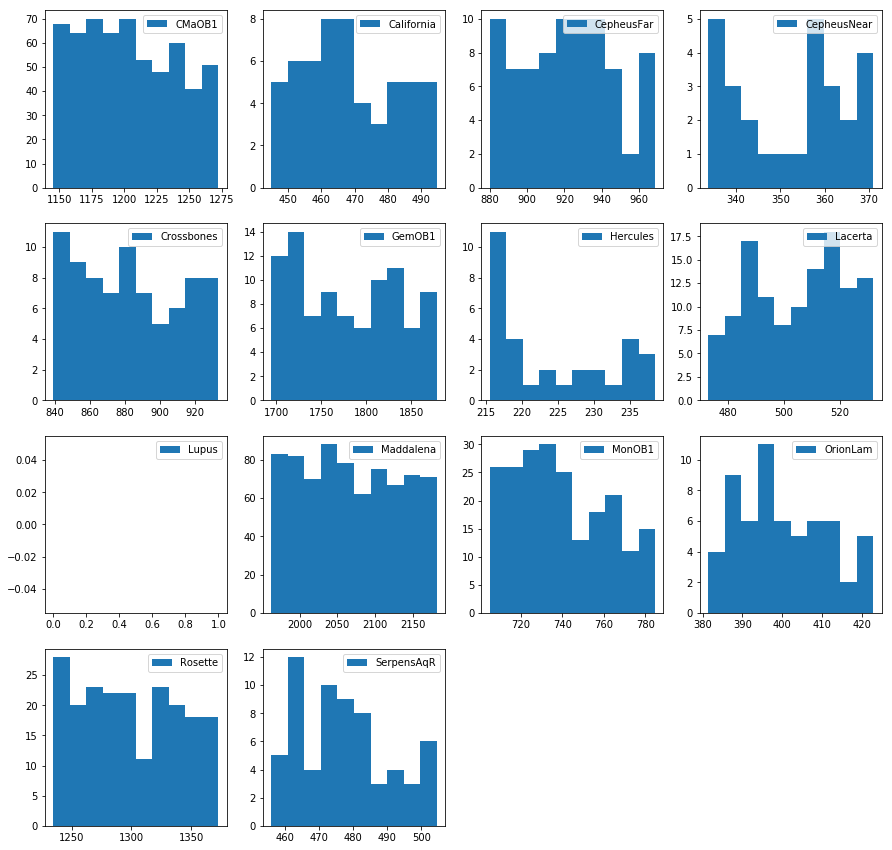

In [5]:
fig = plt.figure(figsize=(15,15))
for i in range(1, 15):
    ax = fig.add_subplot(4, 4, i)
    ax.hist(d['mol'+str(i-1)]['dist'], bins=10, label=mol['name'][i-1])
    #ax.set_xlim([0, 1])
    plt.legend(markerscale=1)

plt.show()

In [102]:
mol0, mol1, mol2, mol3, mol4, mol5, mol6, mol7, mol8, mol9, mol10, mol11, mol12, mol13 = Table(d['mol0']), Table(d['mol1']), Table(d['mol2']), Table(d['mol3']), Table(d['mol4']), Table(d['mol5']), Table(d['mol6']), Table(d['mol7']), Table(d['mol8']), Table(d['mol9']), Table(d['mol10']), Table(d['mol11']), Table(d['mol12']), Table(d['mol13'])
mols = mol0, mol1, mol2, mol3, mol4, mol5, mol6, mol7, mol8, mol9, mol10, mol11, mol12, mol13

for i in range(len(mol)):
    try:
        mols[i]['name'] = mol['name'][i]
    except TypeError:
        pass

allmol = Table()
for i in range(len(mol)):
    allmol = vstack([allmol, mols[i]])
#ascii.write(allmol, 'plane_gaia_molclouds_03-19-19.txt', format='basic')

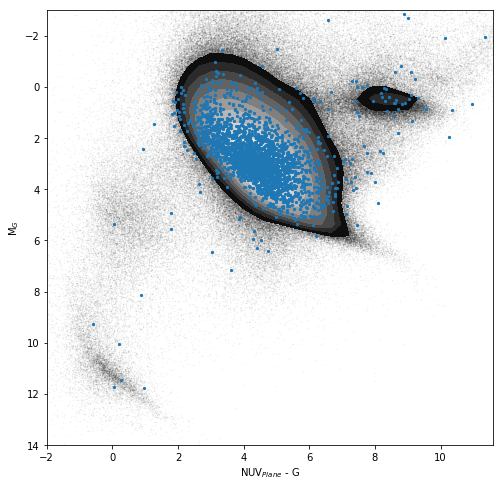

In [103]:
threshold = 1000 
bins = 40
molnum = mol13
fig = plt.figure(figsize=(8,8))
scatter_contour(pg['nuv']-pg['phot_g_mean_mag'], pg['phot_g_mean_mag']-pg['distmod'], threshold=threshold, log_counts=True, histogram2d_args=dict(bins=bins, range=[[-1,12], [-2,14]]), plot_args=dict(color='k', markersize=1, alpha=0.05), contour_args=dict(cmap=cm.gray, zorder=10))

plt.scatter(allmol['nuv']-allmol['phot_g_mean_mag'], allmol['phot_g_mean_mag']-allmol['distmod'], s=5, zorder=10)
plt.xlabel('NUV$_{Plane}$ - G')
plt.ylabel('M$_{G}$')
plt.xlim((-2, 11.6))
plt.ylim((14, -3))
plt.show()

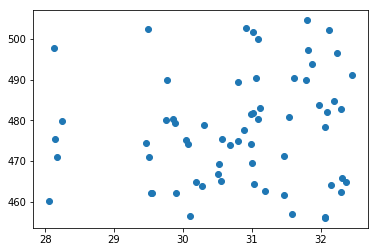

In [58]:
molnum = mol13
plt.scatter(molnum['gl'], molnum['dist'])
plt.show()